In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage import io, img_as_ubyte

In [2]:
def calculate_glcm_properties_per_channel(image_list):
    contrast_r, contrast_g, contrast_b = [], [], []
    correlation_r, correlation_g, correlation_b = [], [], []
    homogeneity_r, homogeneity_g, homogeneity_b = [], [], []
    dissimilarity_r, dissimilarity_g, dissimilarity_b = [], [], []
    energy_r, energy_g, energy_b = [], [], []
    
    for img_path in image_list:
        image = io.imread(img_path)
        
        # Pisahkan channel warna
        red_channel = image[:, :, 0]
        green_channel = image[:, :, 1]
        blue_channel = image[:, :, 2]
        
        # Menghitung GLCM untuk setiap channel
        def glcm_props(channel):
            image = img_as_ubyte(channel)

            bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]) #16-bit
            inds = np.digitize(image, bins)

            max_value = inds.max()+1
            glcm = graycomatrix(inds, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=max_value, symmetric=False, normed=False)

            contrast = graycoprops(glcm, 'contrast')
            correlation = graycoprops(glcm, 'correlation')
            homogeneity = graycoprops(glcm, 'homogeneity')
            dissimilarity = graycoprops(glcm, 'dissimilarity')
            energy = graycoprops(glcm, 'energy')

            return contrast, correlation, homogeneity, dissimilarity, energy

        # Ekstraksi properti untuk tiap channel
        c_r, co_r, h_r, d_r, e_r = glcm_props(red_channel)
        c_g, co_g, h_g, d_g, e_g = glcm_props(green_channel)
        c_b, co_b, h_b, d_b, e_b = glcm_props(blue_channel)
        
        contrast_r.append(c_r)
        correlation_r.append(co_r)
        homogeneity_r.append(h_r)
        dissimilarity_r.append(d_r)
        energy_r.append(e_r)
        
        contrast_g.append(c_g)
        correlation_g.append(co_g)
        homogeneity_g.append(h_g)
        dissimilarity_g.append(d_g)
        energy_g.append(e_g)
        
        contrast_b.append(c_b)
        correlation_b.append(co_b)
        homogeneity_b.append(h_b)
        dissimilarity_b.append(d_b)
        energy_b.append(e_b)
    
    # Mengembalikan rata-rata dari setiap properti
    return (np.mean(contrast_r), np.mean(correlation_r), np.mean(homogeneity_r), np.mean(dissimilarity_r), np.mean(energy_r),
            np.mean(contrast_g), np.mean(correlation_g), np.mean(homogeneity_g), np.mean(dissimilarity_g), np.mean(energy_g),
            np.mean(contrast_b), np.mean(correlation_b), np.mean(homogeneity_b), np.mean(dissimilarity_b), np.mean(energy_b))

In [3]:
base_dir = 'data/images/'

sessions = [
    [os.path.join(base_dir, 'fortune', f'fortune_{i}.png') for i in range(1, 51)],  # Minyak Goreng Fortune
    [os.path.join(base_dir, 'curah', f'curah_{i}.png') for i in range(1, 51)],  # Minyak Goreng Curah
]

In [4]:
avg_contrast_r, avg_correlation_r, avg_homogeneity_r, avg_dissimilarity_r, avg_energy_r = [], [], [], [], []
avg_contrast_g, avg_correlation_g, avg_homogeneity_g, avg_dissimilarity_g, avg_energy_g = [], [], [], [], []
avg_contrast_b, avg_correlation_b, avg_homogeneity_b, avg_dissimilarity_b, avg_energy_b = [], [], [], [], []

for session in sessions:
    c_r, co_r, h_r, d_r, e_r, c_g, co_g, h_g, d_g, e_g, c_b, co_b, h_b, d_b, e_b = calculate_glcm_properties_per_channel(session)
    
    avg_contrast_r.append(c_r)
    avg_correlation_r.append(co_r)
    avg_homogeneity_r.append(h_r)
    avg_dissimilarity_r.append(d_r)
    avg_energy_r.append(e_r)
    
    avg_contrast_g.append(c_g)
    avg_correlation_g.append(co_g)
    avg_homogeneity_g.append(h_g)
    avg_dissimilarity_g.append(d_g)
    avg_energy_g.append(e_g)
    
    avg_contrast_b.append(c_b)
    avg_correlation_b.append(co_b)
    avg_homogeneity_b.append(h_b)
    avg_dissimilarity_b.append(d_b)
    avg_energy_b.append(e_b)

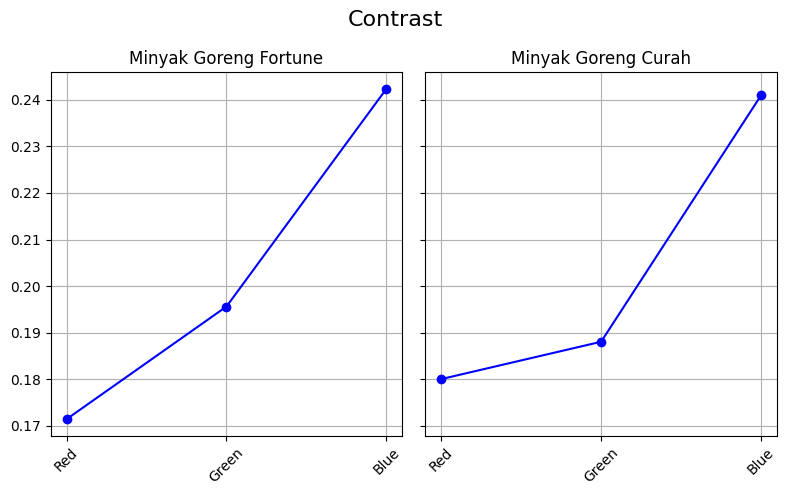

In [19]:
x_labels = ['Red', 'Green', 'Blue']
sessions_labels = ['Minyak Goreng Fortune', 'Minyak Goreng Curah']

fig, axs = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

for i, label in enumerate(sessions_labels):
    axs[i].plot(x_labels, [avg_contrast_r[i], avg_contrast_g[i], avg_contrast_b[i]], marker='o', label='Contrast', color='blue')
    axs[i].set_title(label)
    axs[i].set_xticks(np.arange(len(x_labels)))
    axs[i].set_xticklabels(x_labels, rotation=45)
    axs[i].grid(True)

# Label dan judul untuk seluruh figure
fig.suptitle('Contrast', fontsize=16)
plt.tight_layout()
plt.show()

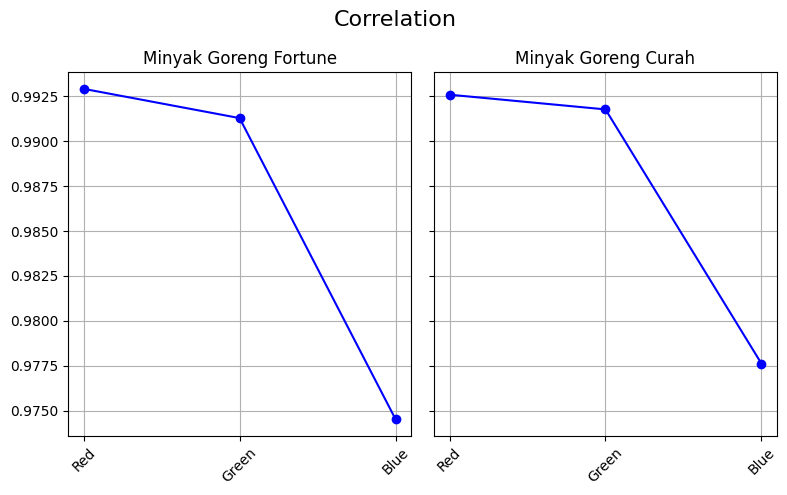

In [20]:
x_labels = ['Red', 'Green', 'Blue']
sessions_labels = ['Minyak Goreng Fortune', 'Minyak Goreng Curah']

fig, axs = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

for i, label in enumerate(sessions_labels):
    axs[i].plot(x_labels, [avg_correlation_r[i], avg_correlation_g[i], avg_correlation_b[i]], marker='o', label='Contrast', color='blue')
    axs[i].set_title(label)
    axs[i].set_xticks(np.arange(len(x_labels)))
    axs[i].set_xticklabels(x_labels, rotation=45)
    axs[i].grid(True)

# Label dan judul untuk seluruh figure
fig.suptitle('Correlation', fontsize=16)
plt.tight_layout()
plt.show()

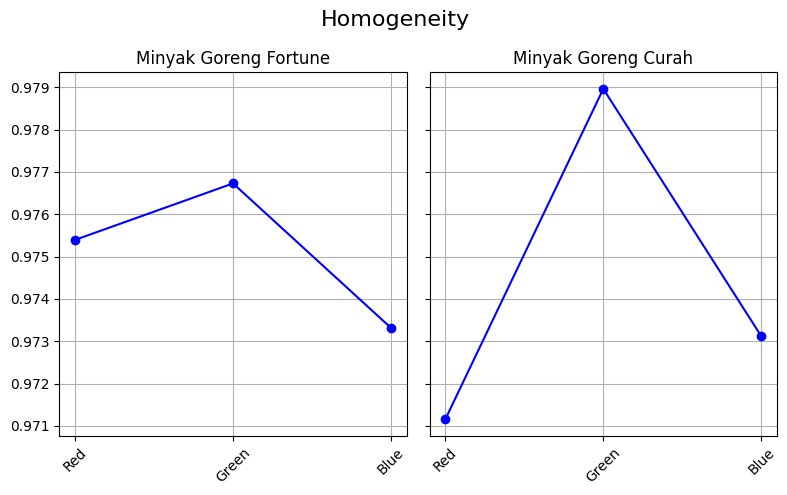

In [21]:
x_labels = ['Red', 'Green', 'Blue']
sessions_labels = ['Minyak Goreng Fortune', 'Minyak Goreng Curah']

fig, axs = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

for i, label in enumerate(sessions_labels):
    axs[i].plot(x_labels, [avg_homogeneity_r[i], avg_homogeneity_g[i], avg_homogeneity_b[i]], marker='o', label='Contrast', color='blue')
    axs[i].set_title(label)
    axs[i].set_xticks(np.arange(len(x_labels)))
    axs[i].set_xticklabels(x_labels, rotation=45)
    axs[i].grid(True)

# Label dan judul untuk seluruh figure
fig.suptitle('Homogeneity', fontsize=16)
plt.tight_layout()
plt.show()

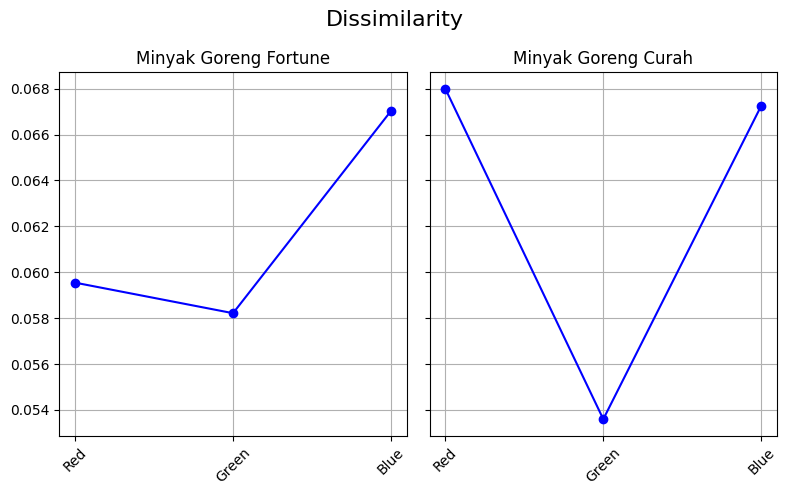

In [22]:
x_labels = ['Red', 'Green', 'Blue']
sessions_labels = ['Minyak Goreng Fortune', 'Minyak Goreng Curah']

fig, axs = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

for i, label in enumerate(sessions_labels):
    axs[i].plot(x_labels, [avg_dissimilarity_r[i], avg_dissimilarity_g[i], avg_dissimilarity_b[i]], marker='o', label='Contrast', color='blue')
    axs[i].set_title(label)
    axs[i].set_xticks(np.arange(len(x_labels)))
    axs[i].set_xticklabels(x_labels, rotation=45)
    axs[i].grid(True)

# Label dan judul untuk seluruh figure
fig.suptitle('Dissimilarity', fontsize=16)
plt.tight_layout()
plt.show()

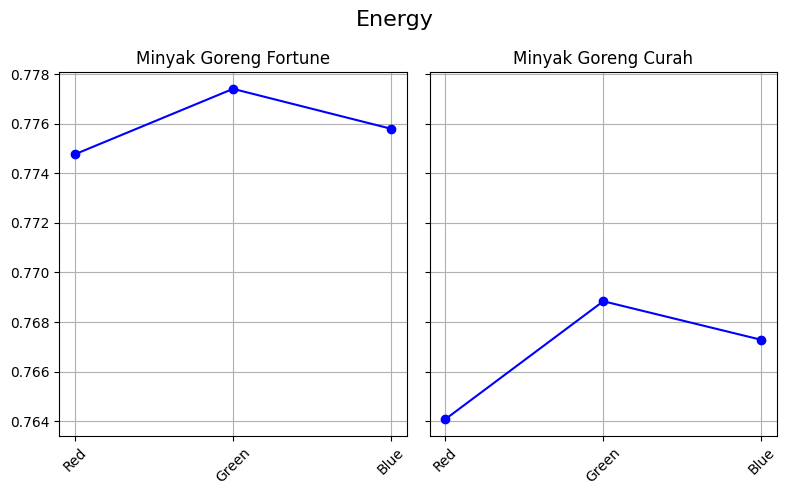

In [23]:
x_labels = ['Red', 'Green', 'Blue']
sessions_labels = ['Minyak Goreng Fortune', 'Minyak Goreng Curah']

fig, axs = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

for i, label in enumerate(sessions_labels):
    axs[i].plot(x_labels, [avg_energy_r[i], avg_energy_g[i], avg_energy_b[i]], marker='o', label='Contrast', color='blue')
    axs[i].set_title(label)
    axs[i].set_xticks(np.arange(len(x_labels)))
    axs[i].set_xticklabels(x_labels, rotation=45)
    axs[i].grid(True)

# Label dan judul untuk seluruh figure
fig.suptitle('Energy', fontsize=16)
plt.tight_layout()
plt.show()

In [24]:
std_contrast_r = np.std(avg_contrast_r)
std_contrast_g = np.std(avg_contrast_g)
std_contrast_b = np.std(avg_contrast_b)

std_correlation_r = np.std(avg_correlation_r)
std_correlation_g = np.std(avg_correlation_g)
std_correlation_b = np.std(avg_correlation_b)

std_homogeneity_r = np.std(avg_homogeneity_r)
std_homogeneity_g = np.std(avg_homogeneity_g)
std_homogeneity_b = np.std(avg_homogeneity_b)

std_dissimilarity_r = np.std(avg_dissimilarity_r)
std_dissimilarity_g = np.std(avg_dissimilarity_g)
std_dissimilarity_b = np.std(avg_dissimilarity_b)

std_energy_r = np.std(avg_energy_r)
std_energy_g = np.std(avg_energy_g)
std_energy_b = np.std(avg_energy_b)

print("\t\t\tStandar Deviasi\n")
print("\t\tRed\t\tGreen\t\tBlue")
print("Contrast \t{:}\t{:}\t{:}".format(std_contrast_r, std_contrast_g, std_contrast_b))
print("Correlation \t{:}\t{:}\t{:}".format(std_correlation_r, std_correlation_g, std_correlation_b))
print("Homogeneity \t{:}\t{:}\t{:}".format(std_homogeneity_r, std_homogeneity_g, std_homogeneity_b))
print("Dissimilarity \t{:}\t{:}\t{:}".format(std_dissimilarity_r, std_dissimilarity_g, std_dissimilarity_b))
print("Energy \t\t{:}\t{:}\t{:}".format(std_energy_r, std_energy_g, std_energy_b))

			Standar Deviasi

		Red		Green		Blue
Contrast 	0.004299583298080556	0.0037802155434149	0.0007078013048442133
Correlation 	0.0001624304022675993	0.00024168708736888034	0.0015467892022487106
Homogeneity 	0.002118840383135645	0.0011175116361836213	9.713065849170643e-05
Dissimilarity 	0.00422264905344958	0.0023088712363926456	0.00011181596203383576
Energy 		0.0053444401765965766	0.004283813421039451	0.00425674903355866


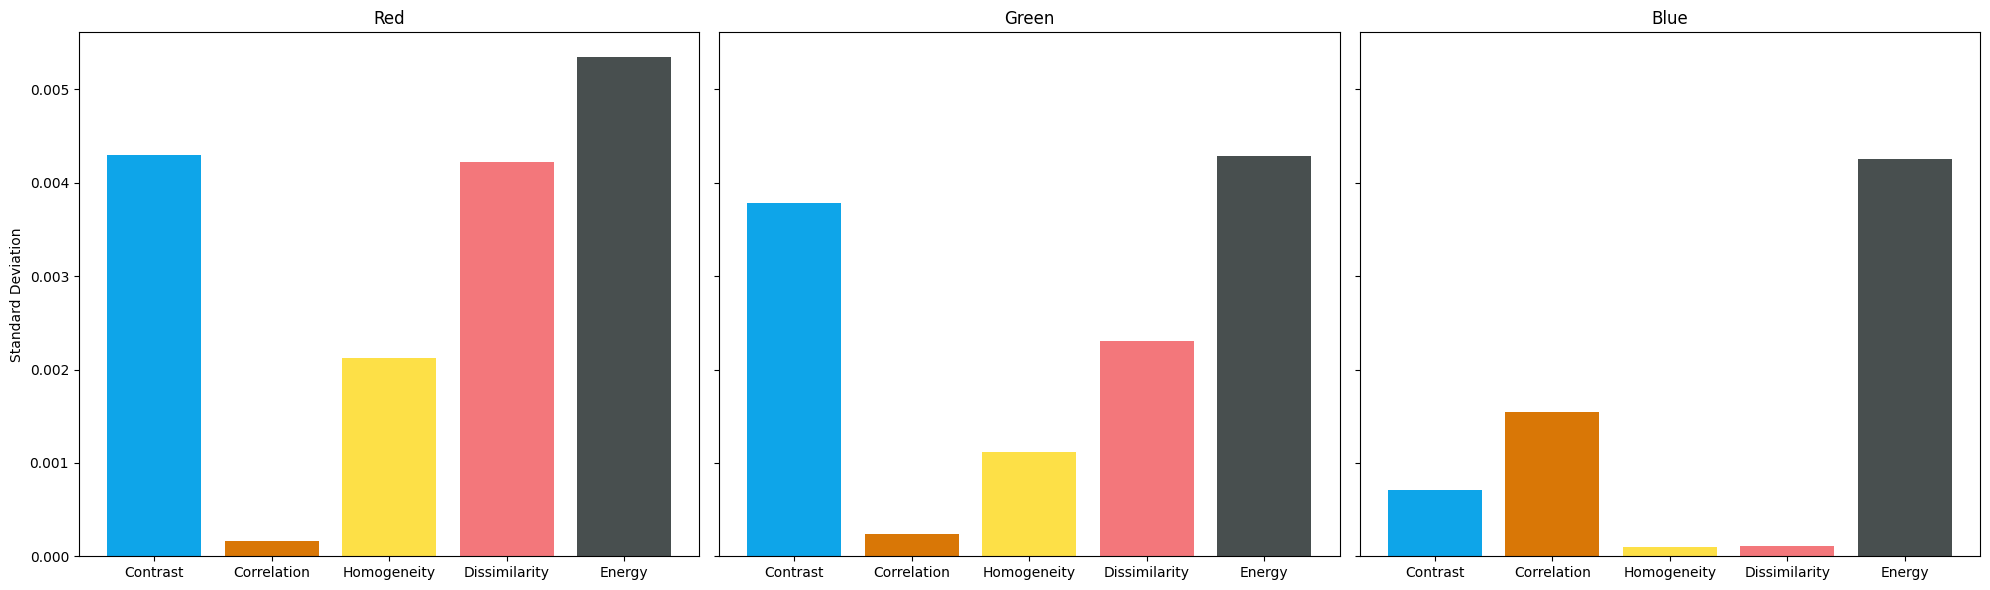

In [25]:
red_values = [std_contrast_r, std_correlation_r, std_homogeneity_r, std_dissimilarity_r, std_energy_r]
green_values = [std_contrast_g, std_correlation_g, std_homogeneity_g, std_dissimilarity_g, std_energy_g]
blue_values = [std_contrast_b, std_correlation_b, std_homogeneity_b, std_dissimilarity_b, std_energy_b]

labels = ['Contrast', 'Correlation', 'Homogeneity', 'Dissimilarity', 'Energy']
colors = ['#0ea5e9', '#d97706', '#fde047', '#f3777b', '#484f4f']

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Plot untuk channel Red
axes[0].bar(labels, red_values, color=colors)
axes[0].set_title('Red')
axes[0].set_ylabel('Standard Deviation')

# Plot untuk channel Green
axes[1].bar(labels, green_values, color=colors)
axes[1].set_title('Green')

# Plot untuk channel Blue
axes[2].bar(labels, blue_values, color=colors)
axes[2].set_title('Blue')

plt.tight_layout()

plt.show()